### Import Library

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN
from sklearn.ensemble import RandomForestRegressor


### Load Data

In [323]:
df = pd.read_csv("D:\Research\data\solarenergy.csv", index_col= "Datetime")


C:\Users\ducth\AppData\Local\Temp\ipykernel_1044\3913413721.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\Research\data\solarenergy.csv", index_col= "Datetime")


In [324]:
df.head()

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
03/08/2020 0:00,11385,27,7.5,75.0,8.0,29.82,69.0
02/08/2020 23:00,12390,27,7.5,77.0,5.0,29.85,69.0
02/08/2020 22:00,13312,27,7.5,70.0,0.0,29.89,69.0
02/08/2020 21:00,13832,27,7.5,33.0,0.0,29.91,69.0
02/08/2020 20:00,14038,27,7.5,21.0,3.0,29.89,69.0


In [325]:
df.index = pd.to_datetime(df.index, format='%d/%m/%Y %H:%M')

In [326]:
df.head()

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2020-08-03 00:00:00,11385,27,7.5,75.0,8.0,29.82,69.0
2020-08-02 23:00:00,12390,27,7.5,77.0,5.0,29.85,69.0
2020-08-02 22:00:00,13312,27,7.5,70.0,0.0,29.89,69.0
2020-08-02 21:00:00,13832,27,7.5,33.0,0.0,29.91,69.0
2020-08-02 20:00:00,14038,27,7.5,21.0,3.0,29.89,69.0


### Exploratory Data Analysis

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116117 entries, 2020-08-03 00:00:00 to 2007-05-01 01:00:00
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   solar_mw                     116117 non-null  int64  
 1   wind-direction               2920 non-null    object 
 2   wind-speed                   2920 non-null    float64
 3   humidity                     2920 non-null    float64
 4   average-wind-speed-(period)  2919 non-null    float64
 5   average-pressure-(period)    2920 non-null    float64
 6   temperature                  2920 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.1+ MB


In [328]:
df.describe()

,solar_mw,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
count,116117.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,10949.277246,10.096986,73.513699,10.129154,30.017760,58.468493
std,2414.378101,4.838185,15.077139,7.261547,0.142006,6.841200
min,1253.000000,1.100000,14.000000,0.000000,29.480000,42.000000
25%,9322.000000,6.600000,65.000000,5.000000,29.920000,53.000000
50%,10501.000000,10.000000,77.000000,9.000000,30.000000,59.000000
75%,12379.000000,13.100000,84.000000,15.000000,30.110000,63.000000
max,21651.000000,26.600000,100.000000,40.000000,30.530000,78.000000


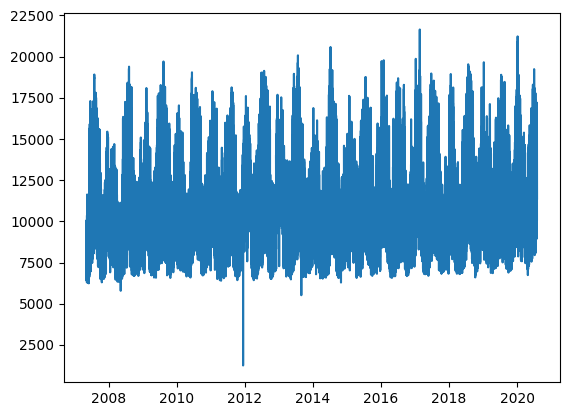

In [329]:
x = df.index
y = df["solar_mw"]

plt.plot(x, y)

<Axes: xlabel='humidity', ylabel='Count'>

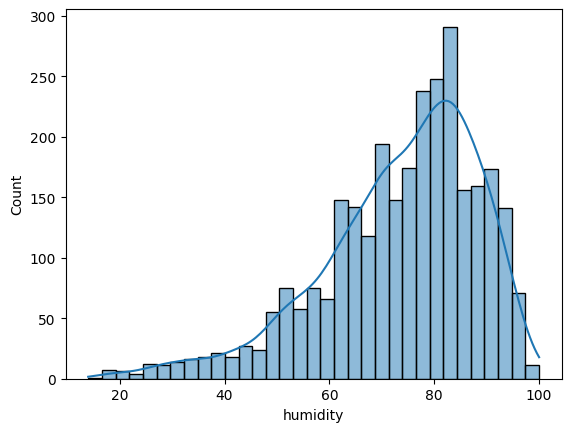

In [330]:
x = df.index
y = df["humidity"]
sns.histplot(y, kde= True)

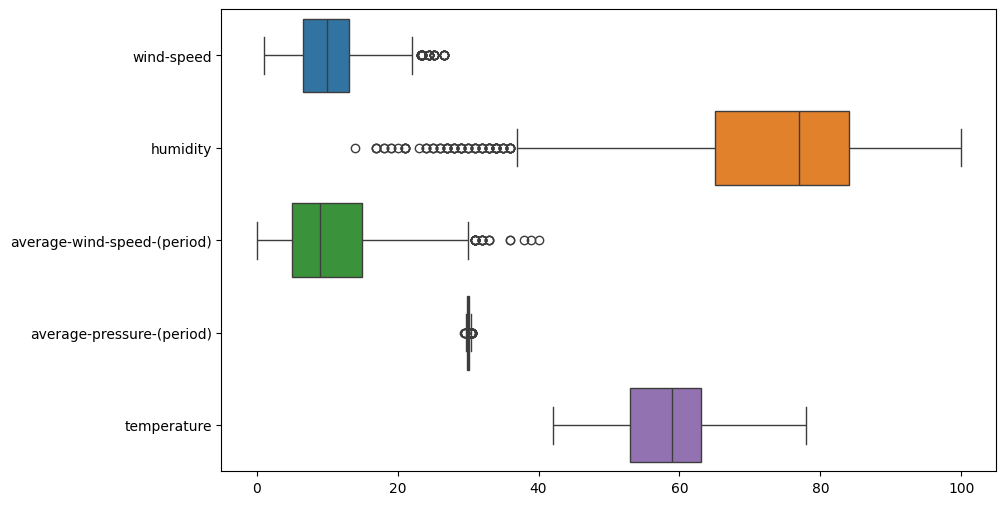

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop("solar_mw", axis=1), orient='h')
plt.show()


### Data Preprocessing

In [332]:
df1 = df.copy()

In [333]:
df1["solar_mw"] = df1["solar_mw"].astype("float")

In [334]:
freq = df1["wind-direction"].mode()[0]
df1["wind-direction"].replace("am", freq, inplace=True)
df1["wind-direction"] = df1["wind-direction"].astype("float")
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116117 entries, 2020-08-03 00:00:00 to 2007-05-01 01:00:00
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   solar_mw                     116117 non-null  float64
 1   wind-direction               2920 non-null    float64
 2   wind-speed                   2920 non-null    float64
 3   humidity                     2920 non-null    float64
 4   average-wind-speed-(period)  2919 non-null    float64
 5   average-pressure-(period)    2920 non-null    float64
 6   temperature                  2920 non-null    float64
dtypes: float64(7)
memory usage: 7.1 MB


In [335]:
df2 = df1.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2206 entries, 2020-08-03 00:00:00 to 2020-05-03 02:00:00
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   solar_mw                     2206 non-null   float64
 1   wind-direction               2206 non-null   float64
 2   wind-speed                   2206 non-null   float64
 3   humidity                     2206 non-null   float64
 4   average-wind-speed-(period)  2206 non-null   float64
 5   average-pressure-(period)    2206 non-null   float64
 6   temperature                  2206 non-null   float64
dtypes: float64(7)
memory usage: 137.9 KB


In [336]:
train_rows = int(0.25 * len(df2))
test_df = df2.iloc[:train_rows]
train_df = df2.iloc[train_rows:]
train_df.head()


,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2020-07-11 01:00:00,11098.0,28.0,10.2,86.0,15.0,29.88,58.0
2020-07-11 00:00:00,12154.0,29.0,19.3,83.0,23.0,29.87,57.0
2020-07-10 23:00:00,13496.0,27.0,19.3,83.0,24.0,29.85,57.0
2020-07-10 22:00:00,14885.0,27.0,19.3,83.0,21.0,29.86,57.0
2020-07-10 21:00:00,15807.0,27.0,19.3,75.0,14.0,29.88,57.0


In [337]:
test_df.head()

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2020-08-03 00:00:00,11385.0,27.0,7.5,75.0,8.0,29.82,69.0
2020-08-02 23:00:00,12390.0,27.0,7.5,77.0,5.0,29.85,69.0
2020-08-02 22:00:00,13312.0,27.0,7.5,70.0,0.0,29.89,69.0
2020-08-02 21:00:00,13832.0,27.0,7.5,33.0,0.0,29.91,69.0
2020-08-02 20:00:00,14038.0,27.0,7.5,21.0,3.0,29.89,69.0


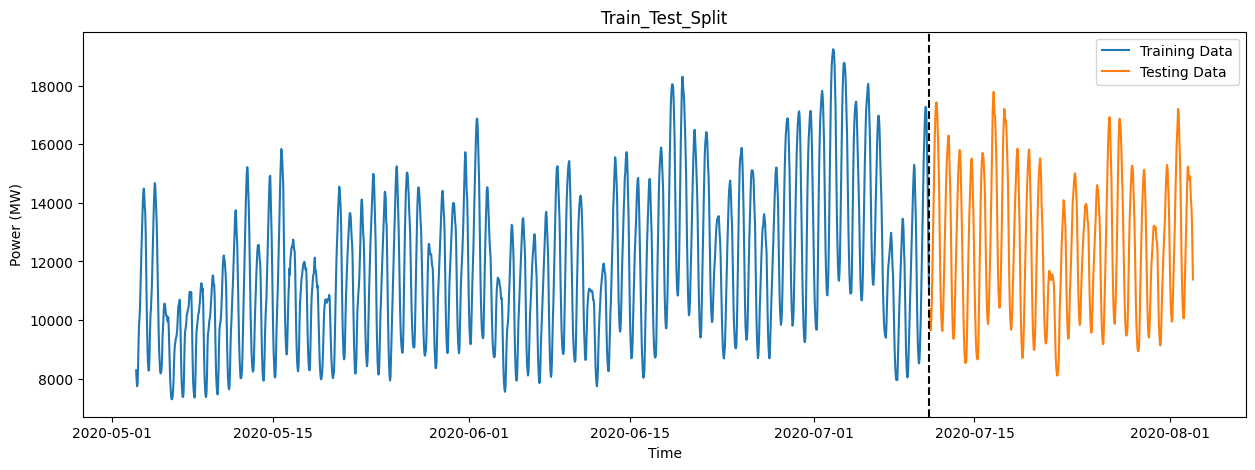

In [338]:
# Tạo hình và trục
fig, ax = plt.subplots(figsize=(15, 5))

# Dữ liệu của tập huấn luyện
x1 = train_df.index
y1 = train_df["solar_mw"]

# Dữ liệu của tập kiểm tra
x2 = test_df.index
y2 = test_df["solar_mw"]

# Vẽ biểu đồ cho dữ liệu tập huấn luyện và tập kiểm tra
ax.plot(x1, y1, label='Training Data')
ax.plot(x2, y2, label='Testing Data')
ax.axvline(train_df.index[0], color= "black", ls= "--")

# Đặt tiêu đề và nhãn trục
ax.set_title('Train_Test_Split')
ax.set_xlabel('Time')
ax.set_ylabel('Power (MW)')

# Thêm chú thích cho biểu đồ
ax.legend()

# Hiển thị biểu đồ
plt.show()


In [339]:
x_train = train_df.drop("solar_mw", axis= 1)
y_train = train_df["solar_mw"]
x_test = test_df.drop("solar_mw", axis= 1)
y_test = test_df["solar_mw"]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1655, 6), (1655,), (551, 6), (551,))

In [340]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [341]:
sc_train = StandardScaler()
sc_test = StandardScaler()

sc_train.fit(x_train)
x_train = sc_train.transform(x_train)
x_test = sc_train.transform(x_test)

sc_test.fit(y_train)
y_train = sc_test.transform(y_train)
y_test = sc_test.transform(y_test)

In [342]:
x_train

array([[ 0.60132786,  0.16788431,  0.7806349 ,  0.74244901, -1.29237861,
         0.66450897],
       [ 0.72028526,  1.81818233,  0.57328137,  1.7983056 , -1.36064385,
         0.48200609],
       [ 0.48237046,  1.81818233,  0.57328137,  1.93028767, -1.49717434,
         0.48200609],
       ...,
       [ 0.72028526,  0.65753317, -1.29290045,  1.00641315, -1.08758288,
         1.2120176 ],
       [ 0.72028526,  0.65753317, -1.63848968,  1.13839523, -1.29237861,
         1.2120176 ],
       [ 0.72028526,  0.65753317,  0.0203386 ,  1.40235938, -1.22411337,
         1.2120176 ]])

### Machine Leaning Model

In [343]:
xgb_model = xgb.XGBRegressor(random_state= 42, n_estimators= 30, max_depth= 3,
                            learning_rate= 0.01, colsample_bytree= 0.5, subsample= 0.5,
                            min_child_weight= 5)
xgb_model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [344]:
y_pre = xgb_model.predict(x_test)
mse = mean_squared_error(y_test, y_pre)
r2 = r2_score(y_test, y_pre)
mae = mean_absolute_error(y_test, y_pre)

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = calculate_mape(y_test, y_pre)

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Absolute Percentage Error (MAPE): 103.01%
Mean Squared Error: 0.9696734273722847
R-squared: -0.14631944223421978
Mean Absolute Error: 0.8289878082467044


In [345]:
# Tạo một đối tượng XGBoostRegressor
xgb_model = xgb.XGBRegressor()

# Thiết lập lưới các tham số cần tìm kiếm
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [10,20,30,40,50,60,70,80,90,100],
    'max_depth': [3, 5, 7]
}

# Tạo một đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Tiến hành tìm kiếm lưới
grid_search.fit(x_train, y_train)

# In ra các siêu tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Đánh giá mô hình trên tập kiểm tra
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score: ", test_score)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 30}
Test Score:  -0.181716319743376


In [346]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7]
}

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)

# Train the model with the best parameters
best_xgb_model = xgb.XGBRegressor(**best_params)
best_xgb_model.fit(x_train, y_train)

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, best_xgb_model.predict(x_test))
print("Test MSE:", test_mse)


Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.5}
Best Negative Mean Squared Error: -1.1854608815812133
Test MSE: 1.0769654689260153


In [347]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
rf_model.fit(x_train, y_train)

# Predict on test set
y_pred = rf_model.predict(x_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pre)

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = calculate_mape(y_test, y_pre)

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

C:\Users\ducth\AppData\Local\Temp\ipykernel_1044\115829859.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


Mean Absolute Percentage Error (MAPE): 103.01%
Mean Squared Error: 1.5444913901955164
R-squared: -0.8258523529331923
Mean Absolute Error: 0.8289878082467044


### Deep Learning Model

In [348]:
model = Sequential([
    SimpleRNN(units=50, activation='relu', input_shape=(x_train.shape[1], 1)),
    Dense(units=1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test), shuffle=False)

Epoch 1/100
104/104 [==============================] - 1s 4ms/step - loss: 0.9503 - val_loss: 1.7107
Epoch 2/100
104/104 [==============================] - 0s 2ms/step - loss: 0.9806 - val_loss: 1.5719
Epoch 3/100
104/104 [==============================] - 0s 2ms/step - loss: 0.9414 - val_loss: 1.5759
Epoch 4/100
104/104 [==============================] - 0s 2ms/step - loss: 0.9320 - val_loss: 1.5881
Epoch 5/100
104/104 [==============================] - 0s 2ms/step - loss: 0.9253 - val_loss: 1.6053
Epoch 6/100
104/104 [==============================] - 0s 2ms/step - loss: 0.9182 - val_loss: 1.6111
Epoch 7/100
104/104 [==============================] - 0s 2ms/step - loss: 0.9118 - val_loss: 1.6157
Epoch 8/100
104/104 [==============================] - 0s 2ms/step - loss: 0.9056 - val_loss: 1.6236
Epoch 9/100
104/104 [==============================] - 0s 2ms/step - loss: 0.8989 - val_loss: 1.6375
Epoch 10/100
104/104 [==============================] - 0s 2ms/step - loss: 0.8947 - val_lo

18/18 [==============================] - 0s 1ms/step


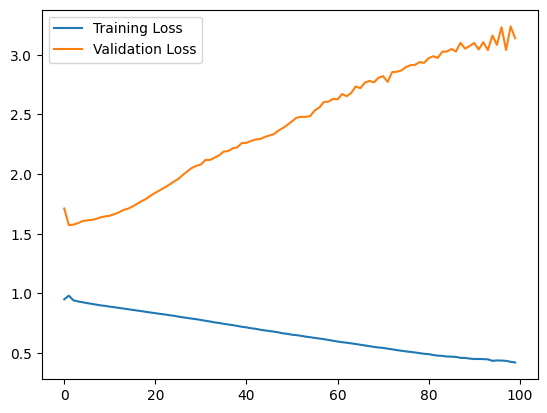

In [349]:
loss = model.evaluate(x_test, y_test)
predicted_data = model.predict(x_test)


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()